##### Introduction:
🚚Delhivery, established in 2011, is India's foremost logistics and supply chain service provider, offering a comprehensive range of solutions including express parcel transportation, warehousing, and last-mile delivery.

Leveraging advanced technology and a vast delivery network, Delhivery efficiently manages nationwide movement of goods, earning trust across businesses of all sizes for its dedication to innovation and customer satisfaction.

As the largest fully integrated player in India by revenue in Fiscal 2021, Delhivery aims to lead the industry by pioneering the commerce operating system, driven by top-tier infrastructure, logistics operations, and innovative data intelligence initiatives led by its Data team.

##### Why this case study?
Delhivery aims to establish itself as the premier player in the logistics industry. This case study is of paramount importance as it aligns with the company's core objectives and operational excellence.

It provides a practical framework for understanding and processing data, which is integral to their operations. By leveraging data engineering pipelines and data analysis techniques, Delhivery can achieve several critical goals.

First, it allows them to ensure data integrity and quality by addressing missing values and structuring the dataset appropriately.

Second, it enables the extraction of valuable features from raw data, which can be utilized for building accurate forecasting models.

Moreover, it facilitates the identification of patterns, insights, and actionable recommendations crucial for optimizing their logistics operations.

Byconducting hypothesis testing and outlier detection, Delhivery can refine their processes and further enhance the quality of service they provide.

##### Problem Statment
The company wants to understand and process the data coming out of data engineering pipelines:

Clean, sanitize and manipulate data to get useful features out of raw fields

Make sense out of the raw data and help the data science team to build forecasting models on it.

Importing packages 

In [63]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spy 
import re 

Loading Dataset 

In [64]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


Understanding the shape and structure 

In [65]:
df.shape

(144867, 24)

There are 144867 Rows and 24 columns 

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [67]:
df[['route_schedule_uuid','route_type','trip_uuid','source_center','source_name',
   'destination_center','destination_name','od_start_time','od_end_time',
   'start_scan_to_end_scan','is_cutoff','actual_distance_to_destination','actual_time','segment_osrm_time','segment_osrm_distance']].head(20)


,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,actual_distance_to_destination,actual_time,segment_osrm_time,segment_osrm_distance
0,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,10.435660,14.0,11.0,11.9653
1,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18.936842,24.0,9.0,9.7590
2,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27.637279,40.0,7.0,10.8152
3,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36.118028,62.0,12.0,13.0224
4,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39.386040,68.0,5.0,3.9153
5,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,10.403038,15.0,11.0,12.1171
6,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18.045481,44.0,6.0,9.1719
7,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,28.061896,65.0,11.0,14.5362
8,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,38.939167,76.0,10.0,11.3648
9,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43.595802,102.0,6.0,6.0434


In [68]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [69]:
df.describe(include=object)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


#### Missing value detection 

In [70]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

##### Observation 
- Source_name and destination_name has null values 
- AS we have very few records having missing values , we can drop those rows for our analysis 

In [71]:
df.drop(df[df['source_name'].isna() | df['destination_name'].isna()].index,inplace=True)

In [72]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

##### Converting the date column into proper datatype 

In [73]:
df.trip_creation_time = pd.to_datetime(df.trip_creation_time)
df.od_start_time = pd.to_datetime(df.od_start_time)
df.od_end_time = pd.to_datetime(df.od_end_time)
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


##### Checking the range of the dataset available 

In [74]:
df.trip_creation_time.dt.to_period("M").astype(str).value_counts()

trip_creation_time
2018-09    126932
2018-10     17384
Name: count, dtype: int64

Data points are from Sep to Oct of 2018 

##### Number of unique categories 

In [75]:
df.nunique()

data                                   2
trip_creation_time                 14787
route_schedule_uuid                 1497
route_type                             2
trip_uuid                          14787
source_center                       1496
source_name                         1496
destination_center                  1466
destination_name                    1466
od_start_time                      26223
od_end_time                        26223
start_scan_to_end_scan              1914
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   92894
actual_distance_to_destination    143965
actual_time                         3182
osrm_time                           1531
osrm_distance                     137544
factor                             45588
segment_actual_time                  746
segment_osrm_time                    214
segment_osrm_distance             113497
segment_factor                      5663
dtype: int64

- There are total of 14817 trips have been made
- There are 1496 source center and 1466 destination center 
    

#### Trip segment analysis 

- Creating a segment key to create a unique identifier for different segment of trip trip_uuid, source_center and destination_center
- Based on segment key , we will create new aggregated columns segment_actual_time,segment_osrm_distance,segment_osrm_time

In [76]:
df['segment_key'] = df.apply(lambda x :"#".join([x['trip_uuid'],x['source_center'],x['destination_center']]),axis =1)
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320#IND388121AAA#IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320#IND388121AAA#IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320#IND388121AAA#IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320#IND388121AAA#IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320#IND388121AAA#IND388620AAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,trip-153746066843555182#IND131028AAB#IND000000ACB
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,trip-153746066843555182#IND131028AAB#IND000000ACB
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,trip-153746066843555182#IND131028AAB#IND000000ACB
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630,trip-153746066843555182#IND131028AAB#IND000000ACB


In [77]:
df['segment_actual_time_cumsum'] = df.groupby('segment_key')['segment_actual_time'].transform(lambda x:x.cumsum())

In [78]:
df['segment_osrm_time_cumsum'] = df.groupby('segment_key')['segment_osrm_time'].transform(lambda x:x.cumsum())
df['segment_osrm_distance_cumsum'] = df.groupby('segment_key')['segment_osrm_distance'].transform(lambda x:x.cumsum())

In [79]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320#IND388121AAA#IND388620AAB,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320#IND388121AAA#IND388620AAB,24.0,20.0,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320#IND388121AAA#IND388620AAB,40.0,27.0,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320#IND388121AAA#IND388620AAB,61.0,39.0,45.5619
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320#IND388121AAA#IND388620AAB,67.0,44.0,49.4772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,67.9280,1.566667,12.0,12.0,8.1858,1.000000,trip-153746066843555182#IND131028AAB#IND000000ACB,92.0,94.0,65.3487
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,85.6829,1.578947,26.0,21.0,17.3725,1.238095,trip-153746066843555182#IND131028AAB#IND000000ACB,118.0,115.0,82.7212
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,97.0933,1.590909,20.0,34.0,20.7053,0.588235,trip-153746066843555182#IND131028AAB#IND000000ACB,138.0,149.0,103.4265
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,111.2709,1.612245,17.0,27.0,18.8885,0.629630,trip-153746066843555182#IND131028AAB#IND000000ACB,155.0,176.0,122.3150


In [80]:
df['segment_actual_time_sum']=df.groupby('segment_key')['segment_actual_time_cumsum'].transform(lambda x:x.iloc[-1])
df['segment_osrm_time_sum']=df.groupby('segment_key')['segment_osrm_time_cumsum'].transform(lambda x:x.iloc[-1])
df['segment_osrm_distance_sum']=df.groupby('segment_key')['segment_osrm_distance_cumsum'].transform(lambda x:x.iloc[-1])

In [81]:
df=df.sort_values(by=['segment_key','od_end_time'])
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_time_cumsum,segment_osrm_distance_cumsum,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,33.0,38.0620,1.515152,trip-153671041653548748#IND209304AAA#IND000000ACB,50.0,33.0,38.0620,728.0,534.0,670.6205
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,8.0,10.9921,1.125000,trip-153671041653548748#IND209304AAA#IND000000ACB,59.0,41.0,49.0541,728.0,534.0,670.6205
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,22.0,30.6308,1.545455,trip-153671041653548748#IND209304AAA#IND000000ACB,93.0,63.0,79.6849,728.0,534.0,670.6205
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,17.0,25.0959,1.470588,trip-153671041653548748#IND209304AAA#IND000000ACB,118.0,80.0,104.7808,728.0,534.0,670.6205
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,14.0,21.0389,1.428571,trip-153671041653548748#IND209304AAA#IND000000ACB,138.0,94.0,125.8197,728.0,534.0,670.6205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86464,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,6.0,6.4998,1.333333,trip-153861115439069069#IND628801AAA#IND628204AAA,29.0,14.0,16.0184,29.0,14.0,16.0184
11572,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,17.0,23.9866,2.647059,trip-153861118270144424#IND583119AAA#IND583101AAA,45.0,17.0,23.9866,233.0,42.0,52.5303
11573,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,25.0,28.5437,7.520000,trip-153861118270144424#IND583119AAA#IND583101AAA,233.0,42.0,52.5303,233.0,42.0,52.5303
11570,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,21.0,23.2367,1.428571,trip-153861118270144424#IND583201AAA#IND583119AAA,30.0,21.0,23.2367,41.0,25.0,28.0484


#### Feature Engineering 

In [82]:
df['od_time_diff_hour']=(df['od_end_time']-df['od_start_time'])/pd.Timedelta(hours=1)
df.od_time_diff_hour

125002    21.010074
125003    21.010074
125004    21.010074
125005    21.010074
125006    21.010074
            ...    
86464      0.736240
11572      4.791233
11573      4.791233
11570      1.115559
11571      1.115559
Name: od_time_diff_hour, Length: 144316, dtype: float64

##### Extract city, place , code and state information 

In [83]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_cumsum', 'segment_osrm_time_cumsum',
       'segment_osrm_distance_cumsum', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour'],
      dtype='object')

In [84]:
df['trip_creation_year']=df['trip_creation_time'].dt.year 
df['trip_creation_month']=df['trip_creation_time'].dt.month 
df['trip_creation_day']=df['trip_creation_time'].dt.day

In [85]:
def get_state(name):
    pattern="\([A-Za-z]+\s?\w+\)"
    pattern="\([A-Za-z &]+\s?\w+\)"
    state=re.findall(pattern, name)[0]
    state=state.replace("(","")
    state=state.replace(")","")
    return state

In [86]:
def get_city(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    state=re.findall(pattern, name)[0]
    city_place_code=name.replace(state,'')
    city_place_code_parts=city_place_code.split("_")
    if len(city_place_code_parts)==1 :
        city=city_place_code_parts[0].strip()
    elif len(city_place_code_parts)==2:
        city=city_place_code.strip()
    elif len(city_place_code_parts)==3 or len(city_place_code_parts)==4:
        city=city_place_code_parts[0].strip()
    else:
        city=city_place_code
    return city 

In [87]:
def get_place(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    try:
        state=re.findall(pattern, name)[0]
        city_place_code=name.replace(state,'')
        city_place_code_parts=city_place_code.split("_")
        if len(city_place_code_parts)==3 or len(city_place_code_parts)==4:
            place=city_place_code_parts[1].strip()
        else:
            place=None
        return place 
    except Exception as exp:
        return None

In [88]:
def get_code(name):
    pattern="\([A-Za-z &]+\s?\w+\)"
    try:
        state=re.findall(pattern, name)[0]
        city_place_code=name.replace(state,'')
        city_place_code_parts=city_place_code.split("_")
        if len(city_place_code_parts)==3 :
            code=city_place_code_parts[2].strip()
        elif  len(city_place_code_parts)==4:
            code="_".join(city_place_code_parts[2:]).strip()
        else:
            code=None
        return code 
    except Exception as exp:
        return None

In [89]:
df['destination_state']=df['destination_name'].map(get_state)
df['source_state']=df['source_name'].map(get_state)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_distance_cumsum,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,trip_creation_year,trip_creation_month,trip_creation_day,destination_state,source_state
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,38.0620,728.0,534.0,670.6205,21.010074,2018,9,12,Haryana,Uttar Pradesh
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,49.0541,728.0,534.0,670.6205,21.010074,2018,9,12,Haryana,Uttar Pradesh
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,79.6849,728.0,534.0,670.6205,21.010074,2018,9,12,Haryana,Uttar Pradesh
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,104.7808,728.0,534.0,670.6205,21.010074,2018,9,12,Haryana,Uttar Pradesh
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,125.8197,728.0,534.0,670.6205,21.010074,2018,9,12,Haryana,Uttar Pradesh


In [90]:
df['destination_city']=df['destination_name'].map(get_city)
df['source_city']=df['source_name'].map(get_state)

In [91]:
df['destination_place']=df['destination_name'].map(get_place)
df['source_place']=df['source_name'].map(get_place)

In [92]:
df['destination_code']=df['destination_name'].map(get_code)
df['source_code']=df['source_name'].map(get_code)

In [93]:
df.destination_name.unique()

array(['Gurgaon_Bilaspur_HB (Haryana)',
       'Kanpur_Central_H_6 (Uttar Pradesh)',
       'Chikblapur_ShntiSgr_D (Karnataka)', ...,
       'Kapadvanj_Busstand_D (Gujarat)', 'Lunawada_VrdhriRD_D (Gujarat)',
       'Jaipur_Central_D_1 (Rajasthan)'], dtype=object)

In [94]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,trip_creation_month,trip_creation_day,destination_state,source_state,destination_city,source_city,destination_place,source_place,destination_code,source_code
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,9,12,Haryana,Uttar Pradesh,Gurgaon,Uttar Pradesh,Bilaspur,Central,HB,H_6
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,9,12,Haryana,Uttar Pradesh,Gurgaon,Uttar Pradesh,Bilaspur,Central,HB,H_6
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,9,12,Haryana,Uttar Pradesh,Gurgaon,Uttar Pradesh,Bilaspur,Central,HB,H_6
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,9,12,Haryana,Uttar Pradesh,Gurgaon,Uttar Pradesh,Bilaspur,Central,HB,H_6
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,9,12,Haryana,Uttar Pradesh,Gurgaon,Uttar Pradesh,Bilaspur,Central,HB,H_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86464,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,10,3,Tamil Nadu,Tamil Nadu,Tirchchndr,Tamil Nadu,Shnmgprm,Busstand,D,D
11572,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,10,3,Karnataka,Karnataka,Bellary_Dc,Karnataka,None,WrdN1DPP,None,D
11573,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,10,3,Karnataka,Karnataka,Bellary_Dc,Karnataka,None,WrdN1DPP,None,D
11570,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,10,3,Karnataka,Karnataka,Sandur,Karnataka,WrdN1DPP,None,D,None


#### In-depth analysis:

##### Grouping and Aggregating at Trip-level

In [95]:
trip_actual_time_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_actual_time_sum=('actual_time','sum')).reset_index()
trip_actual_time_sum_df

,trip_uuid,trip_actual_time_sum
0,trip-153671041653548748,1562.0
1,trip-153671042288605164,143.0
2,trip-153671043369099517,3347.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,341.0
...,...,...
14782,trip-153861095625827784,83.0
14783,trip-153861104386292051,21.0
14784,trip-153861106442901555,282.0
14785,trip-153861115439069069,264.0


In [96]:
trip_segment_actual_time_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_segment_actual_time_sum=('segment_actual_time_sum','sum')).reset_index()
trip_segment_actual_time_sum_df

,trip_uuid,trip_segment_actual_time_sum
0,trip-153671041653548748,1548.0
1,trip-153671042288605164,141.0
2,trip-153671043369099517,3308.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,340.0
...,...,...
14782,trip-153861095625827784,82.0
14783,trip-153861104386292051,21.0
14784,trip-153861106442901555,281.0
14785,trip-153861115439069069,258.0


In [97]:
trip_segment_osrm_time_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_segment_osrm_time_sum=('segment_osrm_time_sum','sum')).reset_index()
trip_segment_osrm_time_sum_df

,trip_uuid,trip_segment_osrm_time_sum
0,trip-153671041653548748,1008.0
1,trip-153671042288605164,65.0
2,trip-153671043369099517,1941.0
3,trip-153671046011330457,16.0
4,trip-153671052974046625,115.0
...,...,...
14782,trip-153861095625827784,62.0
14783,trip-153861104386292051,11.0
14784,trip-153861106442901555,88.0
14785,trip-153861115439069069,221.0


In [98]:
trip_segment_osrm_distance_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_segment_osrm_distance_sum=('segment_osrm_distance_sum','sum')).reset_index()
trip_segment_osrm_distance_sum_df

,trip_uuid,trip_segment_osrm_distance_sum
0,trip-153671041653548748,1320.4733
1,trip-153671042288605164,84.1894
2,trip-153671043369099517,2545.2678
3,trip-153671046011330457,19.8766
4,trip-153671052974046625,146.7919
...,...,...
14782,trip-153861095625827784,64.8551
14783,trip-153861104386292051,16.0883
14784,trip-153861106442901555,104.8866
14785,trip-153861115439069069,223.5324


In [99]:
trip_osrm_time_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_osrm_time_sum=('osrm_time','sum')).reset_index()
trip_osrm_time_sum_df

,trip_uuid,trip_osrm_time_sum
0,trip-153671041653548748,717.0
1,trip-153671042288605164,68.0
2,trip-153671043369099517,1740.0
3,trip-153671046011330457,15.0
4,trip-153671052974046625,117.0
...,...,...
14782,trip-153861095625827784,62.0
14783,trip-153861104386292051,12.0
14784,trip-153861106442901555,48.0
14785,trip-153861115439069069,179.0


In [100]:
trip_osrm_distance_sum_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_osrm_distance_sum=('osrm_distance','sum')).reset_index()
trip_osrm_distance_sum_df

,trip_uuid,trip_osrm_distance_sum
0,trip-153671041653548748,991.3523
1,trip-153671042288605164,85.1110
2,trip-153671043369099517,2354.0665
3,trip-153671046011330457,19.6800
4,trip-153671052974046625,146.7918
...,...,...
14782,trip-153861095625827784,73.4630
14783,trip-153861104386292051,16.0882
14784,trip-153861106442901555,58.9037
14785,trip-153861115439069069,171.1103


In [101]:
trip_total_time_in_hrs_df=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby(['trip_uuid']).agg(trip_total_time_in_hrs=('od_time_diff_hour','sum')).reset_index()
trip_total_time_in_hrs_df

,trip_uuid,trip_total_time_in_hrs
0,trip-153671041653548748,37.668497
1,trip-153671042288605164,3.026865
2,trip-153671043369099517,65.572709
3,trip-153671046011330457,1.674916
4,trip-153671052974046625,11.972484
...,...,...
14782,trip-153861095625827784,4.300482
14783,trip-153861104386292051,1.009842
14784,trip-153861106442901555,7.035331
14785,trip-153861115439069069,5.808548


Combine all trip aggregated dataframes to single trip aggregations dataframe

In [102]:
trip_aggregated_df=pd.concat(
    objs=(
            iDF.set_index('trip_uuid') for iDF in (trip_actual_time_sum_df,trip_osrm_time_sum_df, trip_osrm_distance_sum_df, 
                                                 trip_segment_actual_time_sum_df,trip_segment_osrm_time_sum_df,trip_segment_osrm_distance_sum_df,
                                                 trip_total_time_in_hrs_df)
         ),
    axis=1, 
    join='inner'
).reset_index()
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
1,trip-153671042288605164,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
2,trip-153671043369099517,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,65.572709
3,trip-153671046011330457,59.0,15.0,19.6800,59.0,16.0,19.8766,1.674916
4,trip-153671052974046625,341.0,117.0,146.7918,340.0,115.0,146.7919,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.4630,82.0,62.0,64.8551,4.300482
14783,trip-153861104386292051,21.0,12.0,16.0882,21.0,11.0,16.0883,1.009842
14784,trip-153861106442901555,282.0,48.0,58.9037,281.0,88.0,104.8866,7.035331
14785,trip-153861115439069069,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548


In [103]:
df=pd.merge(df,trip_aggregated_df, on='trip_uuid' )
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_place,destination_code,source_code,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
2,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
3,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
4,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,Busstand,D,D,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548
144312,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,WrdN1DPP,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793
144313,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,WrdN1DPP,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793
144314,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,None,D,None,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793


####  Outlier Detection & Treatment

a. Find any existing outliers in numerical features.

b. Visualize the outlier values using Boxplot.

c. Handle the outliers using the IQR method.

Perform one-hot encoding on categorical features.

Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [104]:
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
1,trip-153671042288605164,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
2,trip-153671043369099517,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,65.572709
3,trip-153671046011330457,59.0,15.0,19.6800,59.0,16.0,19.8766,1.674916
4,trip-153671052974046625,341.0,117.0,146.7918,340.0,115.0,146.7919,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.4630,82.0,62.0,64.8551,4.300482
14783,trip-153861104386292051,21.0,12.0,16.0882,21.0,11.0,16.0883,1.009842
14784,trip-153861106442901555,282.0,48.0,58.9037,281.0,88.0,104.8866,7.035331
14785,trip-153861115439069069,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548


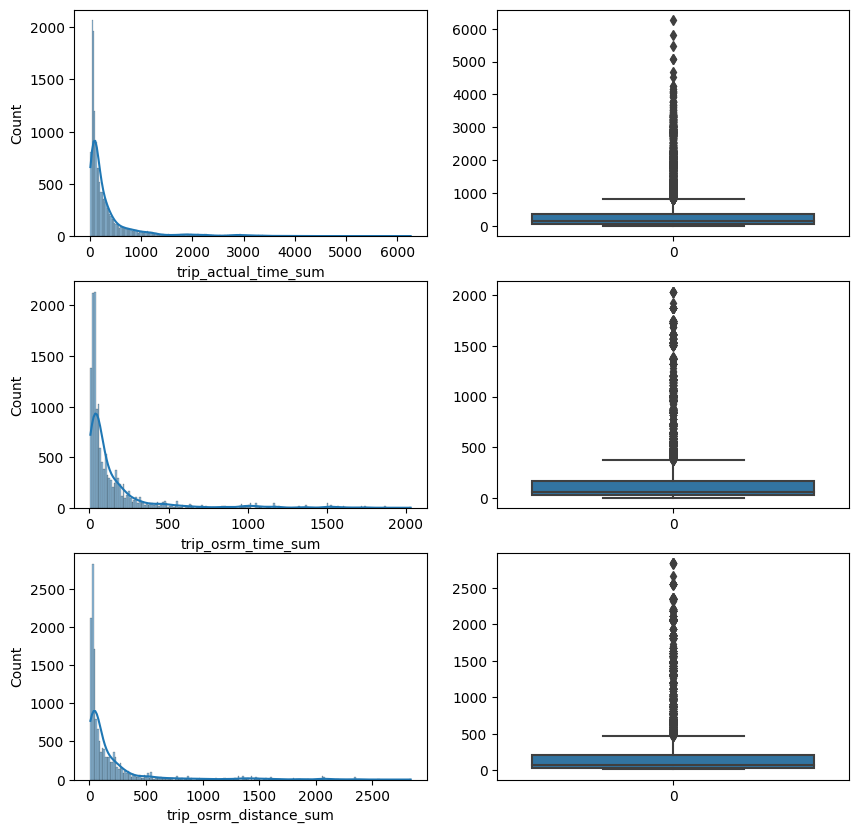

In [105]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))
sns.histplot(ax=axs[0,0],data= trip_aggregated_df['trip_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data=trip_aggregated_df['trip_actual_time_sum'])

sns.histplot(ax=axs[1,0],data= trip_aggregated_df['trip_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip_aggregated_df['trip_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip_aggregated_df['trip_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip_aggregated_df['trip_osrm_distance_sum'])


plt.show()

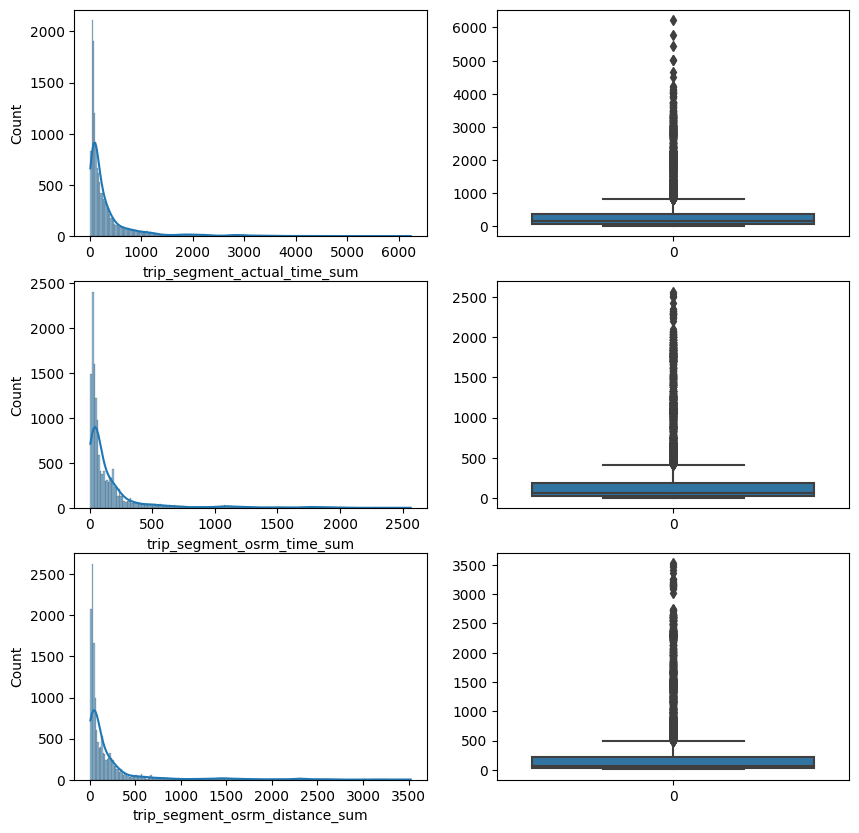

In [106]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))

sns.histplot(ax=axs[0,0],data= trip_aggregated_df['trip_segment_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data= trip_aggregated_df['trip_segment_actual_time_sum'])


sns.histplot(ax=axs[1,0],data= trip_aggregated_df['trip_segment_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip_aggregated_df['trip_segment_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip_aggregated_df['trip_segment_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip_aggregated_df['trip_segment_osrm_distance_sum'])


plt.show()

In [107]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_place,destination_code,source_code,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
2,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
3,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
4,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Central,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,Busstand,D,D,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548
144312,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,WrdN1DPP,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793
144313,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,WrdN1DPP,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793
144314,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,None,D,None,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793


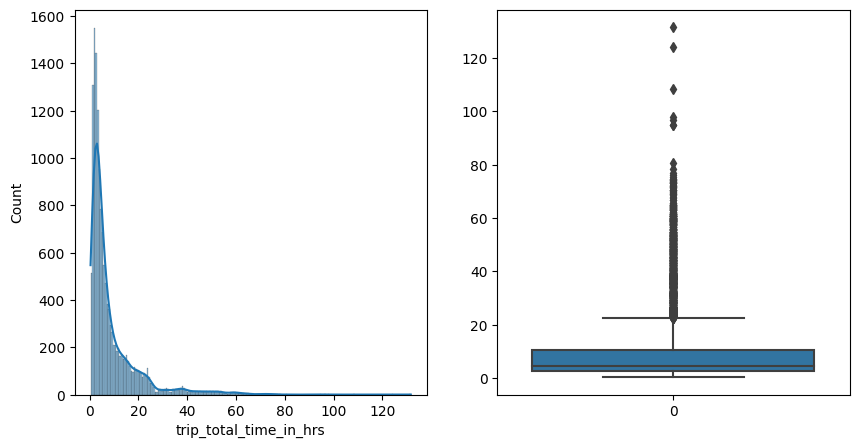

In [108]:

import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols= 2,  figsize=(10,5))
sns.histplot(ax=axs[0],data= trip_aggregated_df['trip_total_time_in_hrs'],kde=True)
sns.boxplot(ax=axs[1],data= trip_aggregated_df['trip_total_time_in_hrs'])
plt.show()


<Axes: xlabel='trip_actual_time_sum', ylabel='Count'>

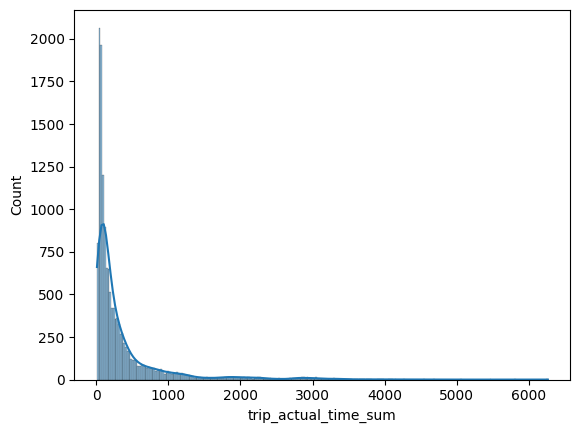

In [109]:
sns.histplot(data=trip_aggregated_df['trip_actual_time_sum'],kde=True)

Observations:
we have lots of outliers let's remove those outliers Based on IQR range, we will maxout values based on IQR range

In [110]:
def clip_value_helper(row,cl, Q1,Q3, minval, maxval):
    #     Q1=row[cl].quantile(0.25)
    #     Q3=row[cl].quantile(0.75)
    #     minval=min(row[cl])
    #     maxval=max(row[cl])
    IQR=Q3-Q1
    if row[cl]<Q1-1.5*IQR:
        return min(minval, Q1-1.5*IQR)
    elif row[cl] > Q3+1.5*IQR:
        return min(maxval, Q3+1.5*IQR)
    else:
        return row[cl]

In [111]:
trip_aggregated_df.columns

Index(['trip_uuid', 'trip_actual_time_sum', 'trip_osrm_time_sum',
       'trip_osrm_distance_sum', 'trip_segment_actual_time_sum',
       'trip_segment_osrm_time_sum', 'trip_segment_osrm_distance_sum',
       'trip_total_time_in_hrs'],
      dtype='object')

In [112]:
for cl in ['trip_actual_time_sum', 'trip_osrm_time_sum', 'trip_osrm_distance_sum', 'trip_segment_actual_time_sum','trip_segment_osrm_time_sum', 'trip_segment_osrm_distance_sum','trip_total_time_in_hrs']:
    Q1=trip_aggregated_df[cl].quantile(0.25)
    Q3=trip_aggregated_df[cl].quantile(0.75)
    minval=min(trip_aggregated_df[cl])
    maxval=max(trip_aggregated_df[cl])
    trip_aggregated_df[cl]=trip_aggregated_df.apply(lambda row:clip_value_helper(row,cl,
                                                                     Q1,Q3,minval, maxval) , axis=1)

In [113]:
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
1,trip-153671042288605164,143.0,68.0,85.11100,141.0,65.0,84.189400,3.026865
2,trip-153671043369099517,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
3,trip-153671046011330457,59.0,15.0,19.68000,59.0,16.0,19.876600,1.674916
4,trip-153671052974046625,341.0,117.0,146.79180,340.0,115.0,146.791900,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.46300,82.0,62.0,64.855100,4.300482
14783,trip-153861104386292051,21.0,12.0,16.08820,21.0,11.0,16.088300,1.009842
14784,trip-153861106442901555,282.0,48.0,58.90370,281.0,88.0,104.886600,7.035331
14785,trip-153861115439069069,264.0,179.0,171.11030,258.0,221.0,223.532400,5.808548


After Clipping Outliers Based On IQR Distribution

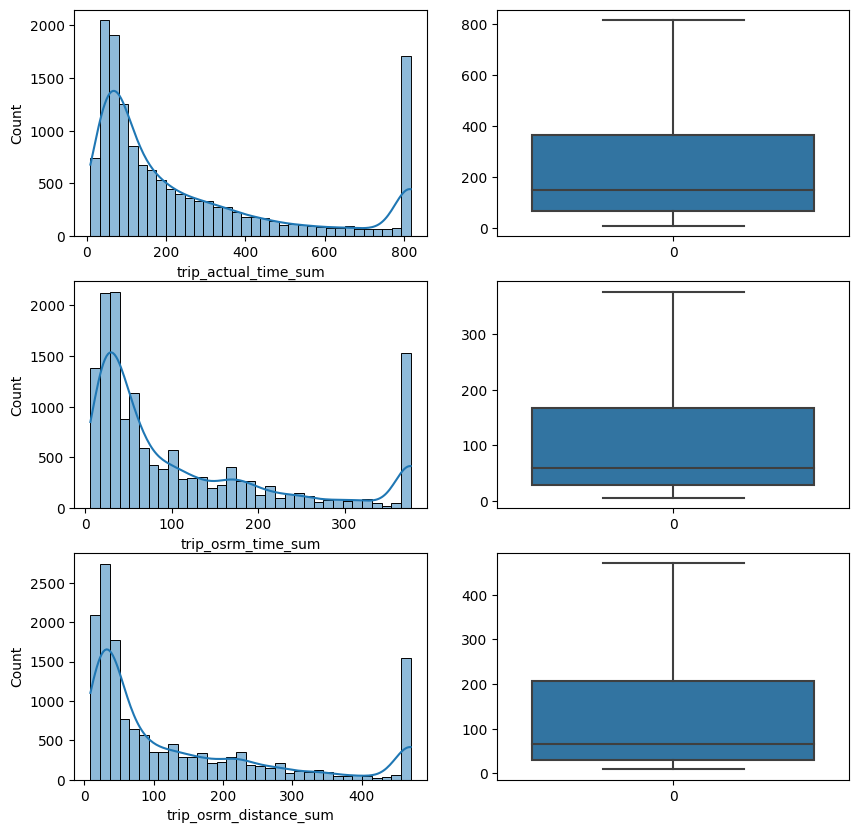

In [114]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))
sns.histplot(ax=axs[0,0],data= trip_aggregated_df['trip_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data=trip_aggregated_df['trip_actual_time_sum'])

sns.histplot(ax=axs[1,0],data= trip_aggregated_df['trip_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip_aggregated_df['trip_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip_aggregated_df['trip_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip_aggregated_df['trip_osrm_distance_sum'])


plt.show()


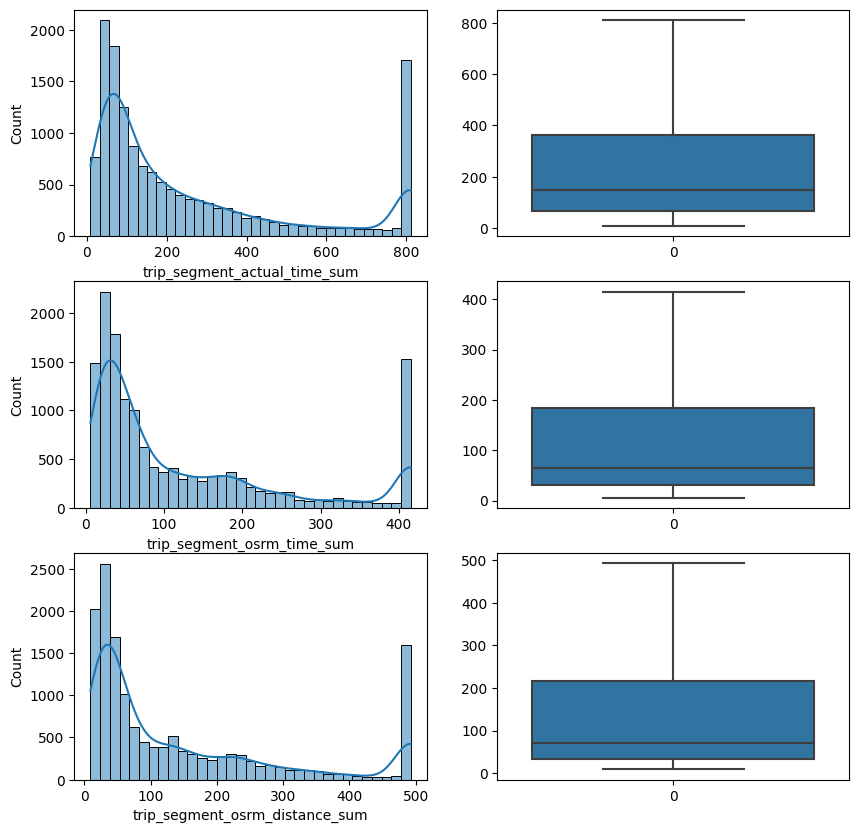

In [115]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 2,  figsize=(10,10))

sns.histplot(ax=axs[0,0],data= trip_aggregated_df['trip_segment_actual_time_sum'],kde=True)
sns.boxplot(ax=axs[0,1],data= trip_aggregated_df['trip_segment_actual_time_sum'])


sns.histplot(ax=axs[1,0],data= trip_aggregated_df['trip_segment_osrm_time_sum'],kde=True)
sns.boxplot(ax=axs[1,1],data= trip_aggregated_df['trip_segment_osrm_time_sum'])

sns.histplot(ax=axs[2,0],data= trip_aggregated_df['trip_segment_osrm_distance_sum'],kde=True)
sns.boxplot(ax=axs[2,1],data= trip_aggregated_df['trip_segment_osrm_distance_sum'])


plt.show()

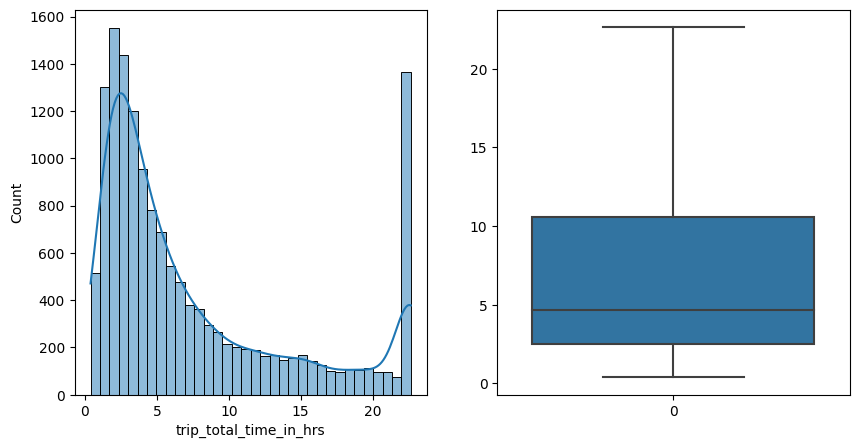

In [116]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols= 2,  figsize=(10,5))
sns.histplot(ax=axs[0],data= trip_aggregated_df['trip_total_time_in_hrs'],kde=True)
sns.boxplot(ax=axs[1],data= trip_aggregated_df['trip_total_time_in_hrs'])
plt.show()

#### Hypothesis Testing
##### actual_time aggregated value and OSRM time aggregated value.

we will use ttest paired sample test to know if there is significant difference in actual trip aggregated time and OSRM trip aggregated time for each trip

HO : mean Actual time to deliver package from source to destination is lesser than OSRM time for entire trip

HA: mean Actual time to deliver package from source to destination is greater than OSRM time

In [117]:
stat, pval=spy.ttest_rel(trip_aggregated_df['trip_actual_time_sum'],
                     trip_aggregated_df['trip_osrm_time_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

stat 112.89026761644506 pval 0.0


In [118]:
if pval <0.05:
    print("We will reject H0 :")
    print("mean Actual time to deliver package from source to destination is greater than OSRM time")
else:
    print("We fail to  reject H0 :")
    print("mean Actual time to deliver package from source to destination is lesser or equal  than OSRM time")

We will reject H0 :
mean Actual time to deliver package from source to destination is greater than OSRM time


In [119]:
np.mean(trip_aggregated_df['trip_actual_time_sum']), np.mean(trip_aggregated_df['trip_osrm_time_sum'])

(262.29289240549133, 114.49563806045852)

##### actual_time aggregated value and segment actual time aggregated value 

we will use ttest paired sample test to know if there is significant difference in actual trip aggregated time and segment actual time aggregated value for each trip

HO : mean Actual aggregated trip time to deliver package from source to destination is lesser than segment actual time aggregated value  for entire trip

HA: mean Actual aggregated trip time to deliver package from source to destination is greater than segment actual time aggregated value  for entire trip

In [120]:
stat, pval=spy.ttest_rel(trip_aggregated_df['trip_actual_time_sum'],
                     trip_aggregated_df['trip_segment_actual_time_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

stat 122.11851987195247 pval 0.0


In [121]:
if pval <0.05:
    print("We will reject H0 :")
    print("mean Actual trip aggregated time   to deliver package from source to destination is greater than segment actual aggregated time")
else:
    print("We fail to  reject H0 :")
    print("mean Actual trip aggregated time to deliver package from source to destination is lesser or equal  than segment actual aggregated time")

We will reject H0 :
mean Actual trip aggregated time   to deliver package from source to destination is greater than segment actual aggregated time


##### OSRM distance aggregated value and segment OSRM distance aggregated value. 

we will use ttest paired sample test to know if there is significant difference in OSRM distance aggregated value and segment actual aggregated distance for each trip

HO : mean Actual aggregated OSRM distance for trip to deliver package from source to destination is lesser than segment actual OSRM distance  aggregated value  for entire trip

HA: mean Actual aggregated OSRM distance  for trip to deliver package from source to destination is greater than segment actual OSRM distance  aggregated value  for entire trip

In [122]:
stat, pval=spy.ttest_rel(trip_aggregated_df['trip_osrm_distance_sum'],
                     trip_aggregated_df['trip_segment_osrm_distance_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

stat -50.07621180430228 pval 1.0


In [123]:
if pval <0.05:
    print("We will reject H0 :")
    print("mean Actual trip OSRM distance for trip  to deliver package from source to destination is greater than segment actual aggregated OSRM distance for trip")
else:
    print("We fail to  reject H0 :")
    print("mean Actual trip OSRM distance for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM distance for trip")

We fail to  reject H0 :
mean Actual trip OSRM distance for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM distance for trip


In [124]:
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
1,trip-153671042288605164,143.0,68.0,85.11100,141.0,65.0,84.189400,3.026865
2,trip-153671043369099517,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
3,trip-153671046011330457,59.0,15.0,19.68000,59.0,16.0,19.876600,1.674916
4,trip-153671052974046625,341.0,117.0,146.79180,340.0,115.0,146.791900,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.46300,82.0,62.0,64.855100,4.300482
14783,trip-153861104386292051,21.0,12.0,16.08820,21.0,11.0,16.088300,1.009842
14784,trip-153861106442901555,282.0,48.0,58.90370,281.0,88.0,104.886600,7.035331
14785,trip-153861115439069069,264.0,179.0,171.11030,258.0,221.0,223.532400,5.808548


In [125]:
np.max(trip_aggregated_df['trip_actual_time_sum']), np.max(trip_aggregated_df['trip_segment_actual_time_sum'])

(817.0, 811.0)

##### OSRM time aggregated value and segment OSRM time aggregated value.

we will use ttest paired sample test to know if there is significant difference in OSRM time aggregated value and segment OSRM aggregated time for each trip

HO : mean Actual aggregated OSRM time aggreated  for trip to deliver package from source to destination is lesser than segment  OSRM  aggregated time   value  for entire trip

HA: mean Actual aggregated OSRM time aggregated   for trip to deliver package from source to destination is greater than segment  OSRM   aggregated time value  for entire trip

In [126]:
stat, pval=spy.ttest_rel(trip_aggregated_df['trip_osrm_time_sum'],
                     trip_aggregated_df['trip_segment_osrm_time_sum'],
                    alternative='greater')
print(f"stat {stat} pval {pval}")

stat -63.41875343116358 pval 1.0


In [127]:
if pval <0.05:
    print("We will reject H0 :")
    print("mean Actual trip aggregated  OSRM time  for trip  to deliver package from source to destination is greater than segment actual aggregated OSRM time for trip")
else:
    print("We fail to  reject H0 :")
    print("mean Actual trip aggregated OSRM time  for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM time for trip")

We fail to  reject H0 :
mean Actual trip aggregated OSRM time  for trip to deliver package from source to destination is lesser or equal  than segment actual aggregated OSRM time for trip


#### Business Insights & Recommendations

From Where the Most Orders are coming from

In [128]:
orders_from_df=df.groupby('source_state').agg(count_trips=('trip_uuid','nunique')).reset_index()
orders_from_df=orders_from_df.sort_values(by='count_trips', ascending=False)
orders_from_df

,source_state,count_trips
17,Maharashtra,2748
14,Karnataka,2324
10,Haryana,1824
25,Tamil Nadu,1109
28,Uttar Pradesh,873
26,Telangana,825
7,Delhi,790
9,Gujarat,774
30,West Bengal,682
23,Punjab,643


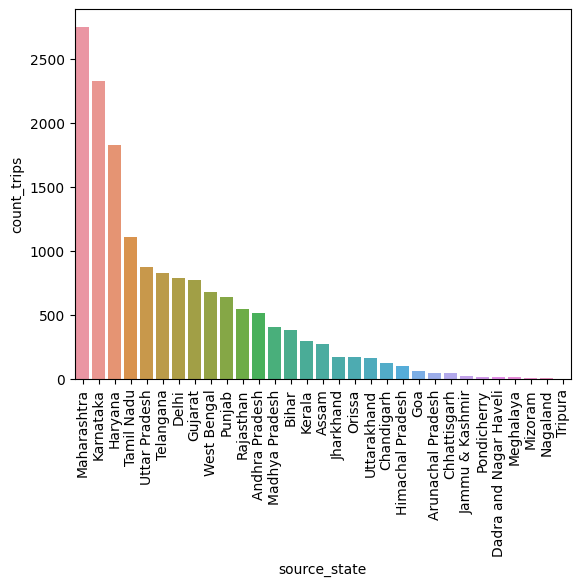

In [129]:
sns.barplot(data=orders_from_df,x='source_state',y='count_trips')
plt.xticks(rotation=90)
plt.show()

To Which State Most orders are going

In [130]:
orders_to_df=df.groupby('destination_state').agg(count_trips=('trip_uuid','nunique')).reset_index()
orders_to_df=orders_to_df.sort_values(by='count_trips', ascending=False)
orders_to_df

,destination_state,count_trips
18,Maharashtra,2637
15,Karnataka,2425
11,Haryana,1800
26,Tamil Nadu,1097
29,Uttar Pradesh,882
27,Telangana,856
10,Gujarat,791
31,West Bengal,713
24,Punjab,693
8,Delhi,674


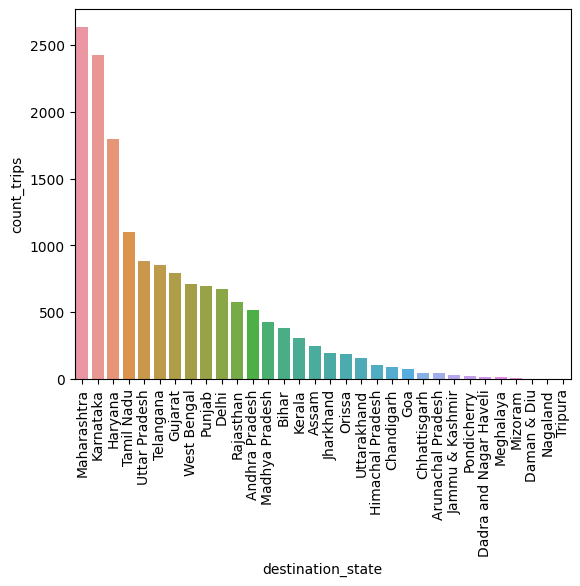

In [131]:
sns.barplot(data=orders_to_df,x='destination_state',y='count_trips')
plt.xticks(rotation=90)
plt.show()

Most Busiest Corridor

In [132]:
df['corridor']=df.apply(lambda x:"#".join([x['source_center'],x['destination_center']]), axis=1)
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,destination_code,source_code,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs,corridor
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
2,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
3,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
4,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,HB,H_6,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,IND209304AAA#IND000000ACB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,...,D,D,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548,IND628801AAA#IND628204AAA
144312,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583119AAA#IND583101AAA
144313,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,None,D,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583119AAA#IND583101AAA
144314,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,D,None,275.0,68.0,80.5787,274.0,67.0,80.5787,5.906793,IND583201AAA#IND583119AAA


In [134]:
corridor_total_trips=df.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(total_trips=('trip_uuid','nunique')).reset_index()
corridor_total_trips


,corridor,total_trips
0,IND000000AAL#IND411033AAA,18
1,IND000000AAQ#IND700028AAB,2
2,IND000000AAS#IND783370AAC,9
3,IND000000AAZ#IND444203AAA,1
4,IND000000AAZ#IND444303AAA,1
...,...,...
2736,IND854326AAB#IND854334AAA,1
2737,IND854334AAA#IND852118AAA,7
2738,IND854334AAA#IND854335AAA,2
2739,IND854335AAA#IND852111AAA,17


In [135]:
corridor_actual_time_mean_df=df.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(corridor_actual_time_mean=('segment_actual_time_cumsum','mean')).reset_index()
corridor_actual_time_mean_df

,corridor,corridor_actual_time_mean
0,IND000000AAL#IND411033AAA,87.388889
1,IND000000AAQ#IND700028AAB,84.500000
2,IND000000AAS#IND783370AAC,61.000000
3,IND000000AAZ#IND444203AAA,287.000000
4,IND000000AAZ#IND444303AAA,159.000000
...,...,...
2736,IND854326AAB#IND854334AAA,171.000000
2737,IND854334AAA#IND852118AAA,28.285714
2738,IND854334AAA#IND854335AAA,40.500000
2739,IND854335AAA#IND852111AAA,39.470588


In [136]:
corridor_osrm_time_mean_df=df.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(corridor_dsrm_time_mean=('segment_osrm_time_cumsum','mean')).reset_index()
corridor_osrm_time_mean_df

,corridor,corridor_dsrm_time_mean
0,IND000000AAL#IND411033AAA,29.777778
1,IND000000AAQ#IND700028AAB,14.000000
2,IND000000AAS#IND783370AAC,29.000000
3,IND000000AAZ#IND444203AAA,77.000000
4,IND000000AAZ#IND444303AAA,68.000000
...,...,...
2736,IND854326AAB#IND854334AAA,47.000000
2737,IND854334AAA#IND852118AAA,21.428571
2738,IND854334AAA#IND854335AAA,29.500000
2739,IND854335AAA#IND852111AAA,19.294118


In [137]:
corridor_osrm_distance_mean_df=df.groupby(['trip_uuid','corridor']).nth(-1).groupby(['corridor']).agg(corridor_osrm_distance_mean=('segment_osrm_distance_cumsum','mean')).reset_index()
corridor_osrm_distance_mean_df

,corridor,corridor_osrm_distance_mean
0,IND000000AAL#IND411033AAA,28.885561
1,IND000000AAQ#IND700028AAB,13.900700
2,IND000000AAS#IND783370AAC,41.461622
3,IND000000AAZ#IND444203AAA,109.306700
4,IND000000AAZ#IND444303AAA,93.706900
...,...,...
2736,IND854326AAB#IND854334AAA,67.378600
2737,IND854334AAA#IND852118AAA,23.881371
2738,IND854334AAA#IND854335AAA,36.500750
2739,IND854335AAA#IND852111AAA,27.870394


In [138]:
corridor_aggregated_df=pd.concat(
    objs=(
            iDF.set_index('corridor') for iDF in (corridor_total_trips,
                                                  corridor_actual_time_mean_df,
                                                  corridor_osrm_distance_mean_df,
                                                   corridor_osrm_time_mean_df
                                                 )
         ),
    axis=1, 
    join='inner'
).reset_index()
corridor_aggregated_df

,corridor,total_trips,corridor_actual_time_mean,corridor_osrm_distance_mean,corridor_dsrm_time_mean
0,IND000000AAL#IND411033AAA,18,87.388889,28.885561,29.777778
1,IND000000AAQ#IND700028AAB,2,84.500000,13.900700,14.000000
2,IND000000AAS#IND783370AAC,9,61.000000,41.461622,29.000000
3,IND000000AAZ#IND444203AAA,1,287.000000,109.306700,77.000000
4,IND000000AAZ#IND444303AAA,1,159.000000,93.706900,68.000000
...,...,...,...,...,...
2736,IND854326AAB#IND854334AAA,1,171.000000,67.378600,47.000000
2737,IND854334AAA#IND852118AAA,7,28.285714,23.881371,21.428571
2738,IND854334AAA#IND854335AAA,2,40.500000,36.500750,29.500000
2739,IND854335AAA#IND852111AAA,17,39.470588,27.870394,19.294118


Busiest Corridor By Trips

In [139]:
top_20Trips_corridor_df=corridor_aggregated_df[['corridor','total_trips']].sort_values(by='total_trips', ascending=False)[:20]
top_20Trips_corridor_df

,corridor,total_trips
1743,IND562132AAA#IND560300AAA,151
1742,IND562132AAA#IND560099AAB,127
1687,IND560099AAB#IND560300AAA,121
1703,IND560300AAA#IND562132AAA,108
1059,IND411033AAA#IND421302AAG,107
1131,IND421302AAG#IND400072AAB,105
1688,IND560099AAB#IND562132AAA,102
66,IND000000ACT#IND000000ACB,100
989,IND400072AAD#IND421302AAG,99
37,IND000000ACB#IND131028AAB,92


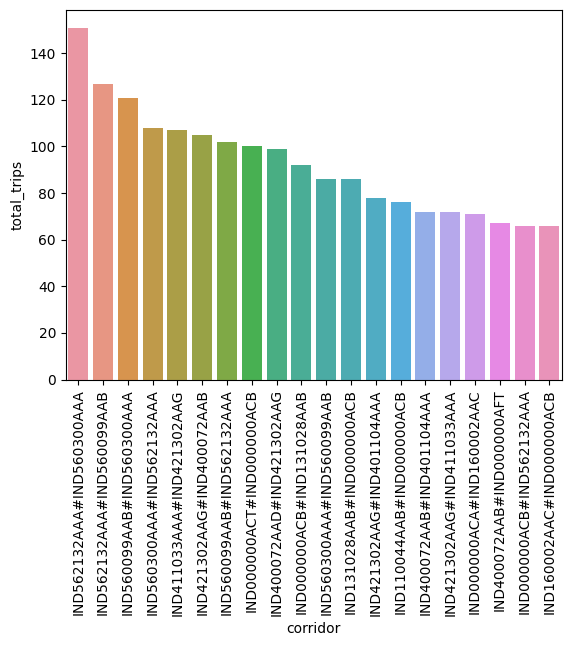

In [141]:
sns.barplot(data=top_20Trips_corridor_df,x='corridor',y='total_trips')
plt.xticks(rotation=90)
plt.show()

Busiest corridor Actual time

In [142]:
top_20trip_time_corridor_df=corridor_aggregated_df[['corridor','corridor_actual_time_mean']].sort_values(by='corridor_actual_time_mean', ascending=False)[:20]
top_20trip_time_corridor_df

,corridor,corridor_actual_time_mean
349,IND160002AAC#IND562132AAA,3751.000000
2475,IND781018AAB#IND110037AAM,3341.764706
115,IND110037AAM#IND781018AAB,3281.000000
2240,IND712311AAA#IND421302AAG,3141.200000
58,IND000000ACB#IND600056AAB,3090.857143
1754,IND562132AAA#IND712311AAA,3010.333333
1148,IND421302AAG#IND712311AAA,2902.000000
348,IND160002AAC#IND421302AAG,2867.000000
57,IND000000ACB#IND562132AAA,2864.136364
1721,IND562132AAA#IND000000ACB,2766.454545


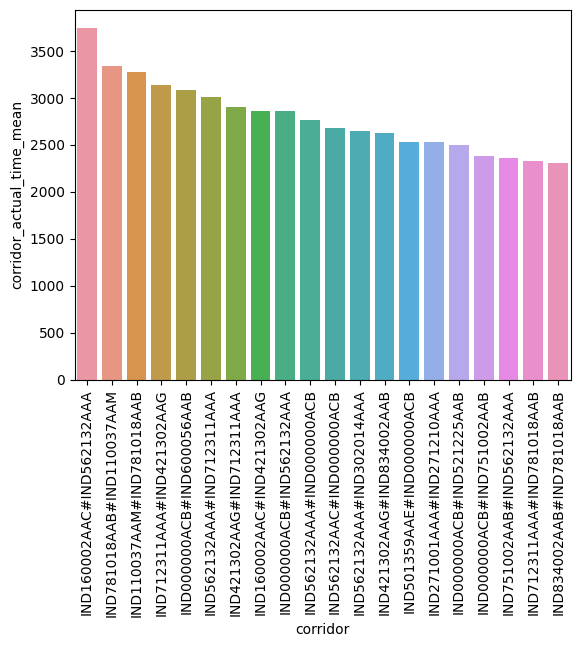

In [143]:
sns.barplot(data=top_20trip_time_corridor_df,x='corridor',y='corridor_actual_time_mean')
plt.xticks(rotation=90)
plt.show()

In [144]:
corridor_aggregated_df[['corridor_actual_time_mean','corridor_osrm_distance_mean','corridor_dsrm_time_mean','total_trips']].corr()

,corridor_actual_time_mean,corridor_osrm_distance_mean,corridor_dsrm_time_mean,total_trips
corridor_actual_time_mean,1.000000,0.926574,0.921375,0.018440
corridor_osrm_distance_mean,0.926574,1.000000,0.995586,0.050239
corridor_dsrm_time_mean,0.921375,0.995586,1.000000,0.050958
total_trips,0.018440,0.050239,0.050958,1.000000


Busiest Corridor by Distance


In [146]:
top_20trip_dist_corridor_df=corridor_aggregated_df[['corridor','corridor_osrm_distance_mean']].sort_values(by='corridor_osrm_distance_mean', ascending=False)[:20]
top_20trip_dist_corridor_df

,corridor,corridor_osrm_distance_mean
1148,IND421302AAG#IND712311AAA,2584.622933
349,IND160002AAC#IND562132AAA,2500.214500
2240,IND712311AAA#IND421302AAG,2363.329580
58,IND000000ACB#IND600056AAB,2361.555264
1721,IND562132AAA#IND000000ACB,2312.589602
1756,IND562132AAC#IND000000ACB,2307.137400
2475,IND781018AAB#IND110037AAM,2300.517159
57,IND000000ACB#IND562132AAA,2288.400620
115,IND110037AAM#IND781018AAB,2181.460700
60,IND000000ACB#IND751002AAB,2134.451707


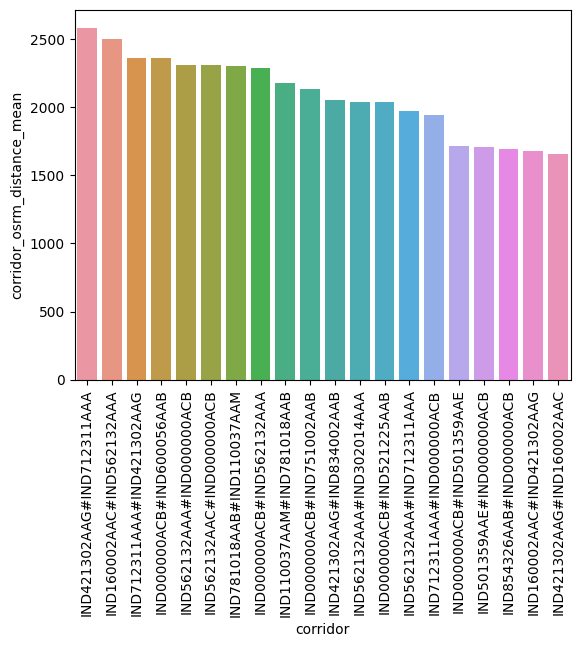

In [147]:
sns.barplot(data=top_20trip_dist_corridor_df,x='corridor',y='corridor_osrm_distance_mean')
plt.xticks(rotation=90)
plt.show()

#### Business Recommendations 

- Maharashtra, Karnataka, Tamil Nadu, Utter Pradesh, Telangana and Gujarat States are states where most delivery trips are done. Most Bussiest corridor are in these states.
- Business should focus on identifying best corridors to move packages very quickly, they should focus on potential reasons for difference in actual delivery time and osrm delivery time value.
- If Actual delivery time is higher than osrm time then should focus on hops which are causing delays, if delays are related to processing or logistic that should be quickly fixed.
- If Issue is not related to delivery and logistic process then should focus on identifying best route to move packages quickly.